# Решение модельных задач с помощью решающих деревьев

## Решающие деревья для регрессии

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
random.seed(42)

Сгенерируем выборку из двумерного нормального распределения. Предсказываемой меткой регрессии назначим расстояние до точки от начала координат. 

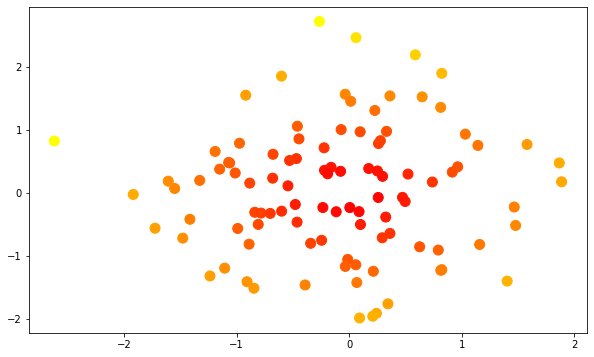

In [3]:
data_x = random.normal(size=(100, 2))
data_y = (data_x[:, 0] ** 2 + data_x[:, 1] ** 2) ** 0.5
figure(figsize=(10.0, 6.0))
scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='autumn')

Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей красивой визуализации

In [4]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return meshgrid(arange(x_min, x_max, 0.01),
                    arange(y_min, y_max, 0.01))

Напишем функцию для обучения на данных, предсказания ответа для каждой точки решетки и визуализации результата

In [5]:
def plot_model(X, y, clf, proba=False):
    clf.fit(X, y)
    xx, yy = get_grid(X)
    if proba:
        predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    else:
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    pcolormesh(xx, yy, predicted, cmap='autumn')
    scatter(X[:, 0], X[:, 1], c=y, s=150, cmap='autumn', alpha=0.7,edgecolors="black")
    ylim([yy.min(),yy.max()])
    xlim([xx.min(),xx.max()])
    return clf

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


DecisionTreeRegressor()

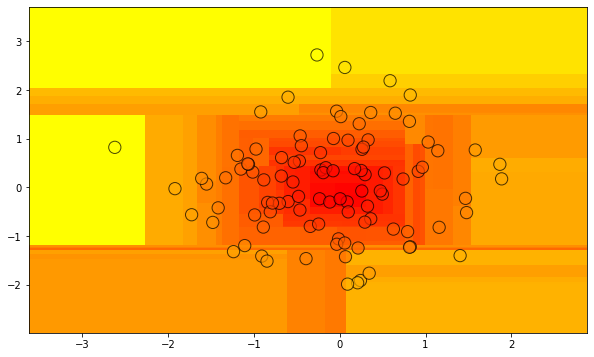

In [6]:
from sklearn.tree import DecisionTreeRegressor
figure(figsize=(10.0, 6.0))
plot_model(data_x, data_y, DecisionTreeRegressor())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


DecisionTreeRegressor(max_depth=3)

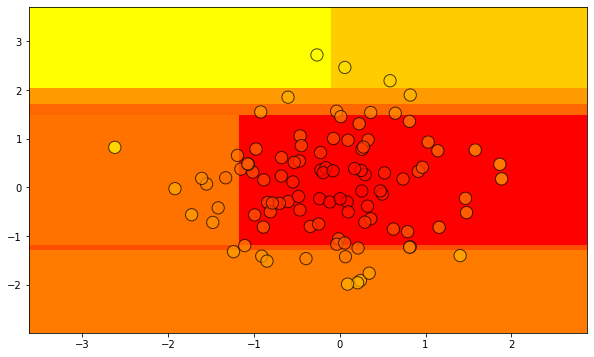

In [7]:
figure(figsize=(10.0, 6.0))
clf = plot_model(data_x, data_y, DecisionTreeRegressor(max_depth=3))
clf

## Визуализация структуры дерева

Визуализируем структуру дерева (необходимо установить pydot и Graphviz).

In [8]:
from sklearn.tree import plot_tree

In [9]:
def draw_decision_tree(clf, column_names):
    plt.figure(figsize=(16,9))
    plot_tree(clf, filled=True, feature_names=column_names)
    plt.show()

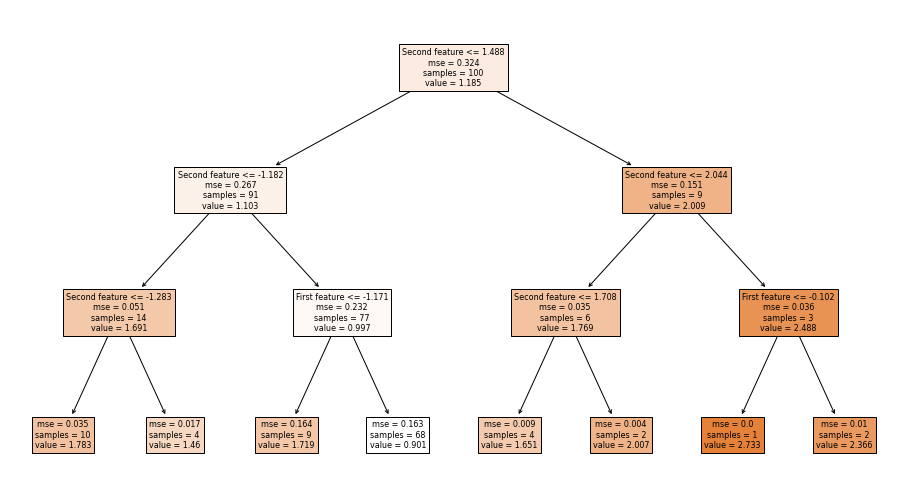

In [10]:
draw_decision_tree(clf, ['First feature', 'Second feature'])

## Перебор параметров дерева

Посмотрим, как меняется картинка для различных значений структурных параметров. Можно увидеть, что увеличение глубины дерева и уменьшение количества объектов в листьях способствует гибкости модели и, как следствие, переобучению (что соответствует интуитивным соображениям о структуре дерева).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y,

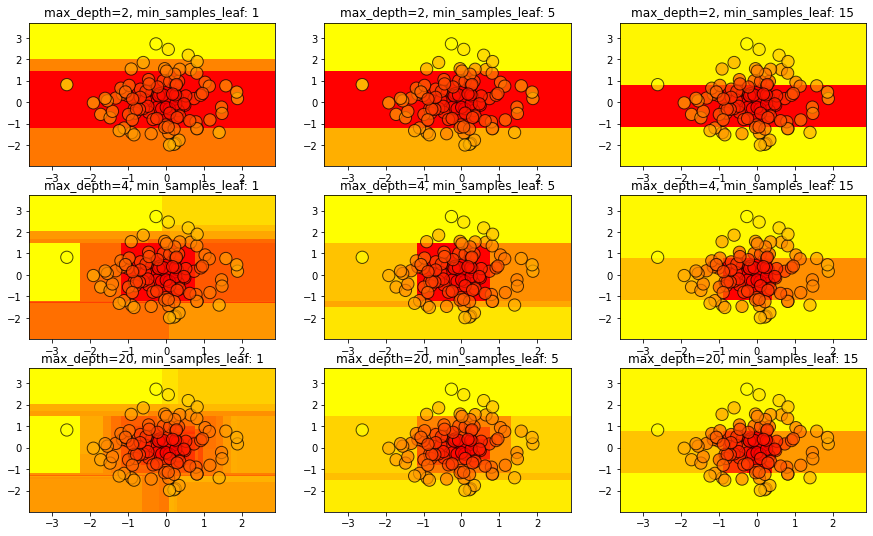

In [14]:
figure(figsize=(15.0, 9.0))
for i, max_depth in enumerate([2, 4, 20]):
    for j, min_samples_leaf in enumerate([1, 5, 15]):
        subplot2grid((3, 3), (i, j))
        plot_model(data_x, data_y, DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf))
        title('max_depth=' + str(max_depth) + ', min_samples_leaf: ' + str(min_samples_leaf))

## Решающие деревья для классификации

Сгенерируем данные. Два класса будут сгенерированы из двух нормальных распределений с разными средними.

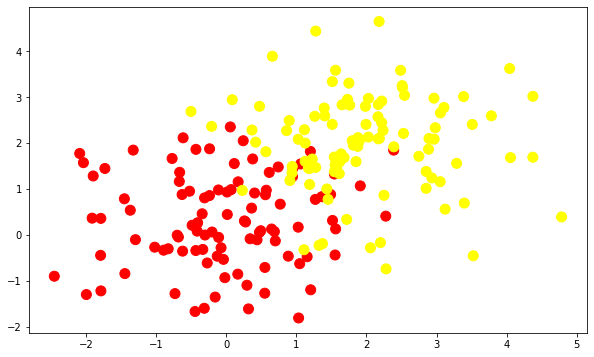

In [15]:
#first class
data_x = random.normal(size=(100, 2))
data_y = zeros(100)

#add second class
data_x = r_[data_x, np.random.normal(size=(100, 2), loc=2)]
data_y = r_[data_y, np.ones(100)]

figure(figsize=(10.0, 6.0))
scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='autumn')

Попробуем разделить эти два класса, обучив решающее дерево. Визуализируем полученную границу разделения класссов.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


DecisionTreeClassifier(min_samples_leaf=5)

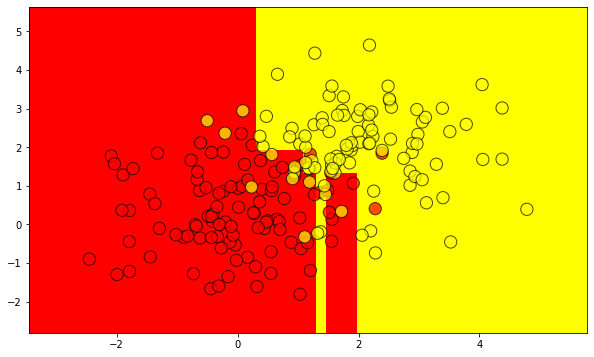

In [16]:
from sklearn.tree import DecisionTreeClassifier
figure(figsize=(10.0, 6.0))
plot_model(data_x, data_y, DecisionTreeClassifier(min_samples_leaf=5))

Проведем ту же процедуру, но теперь предскажем вещественные вероятности принадлежности первому классу. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


DecisionTreeClassifier(min_samples_leaf=5)

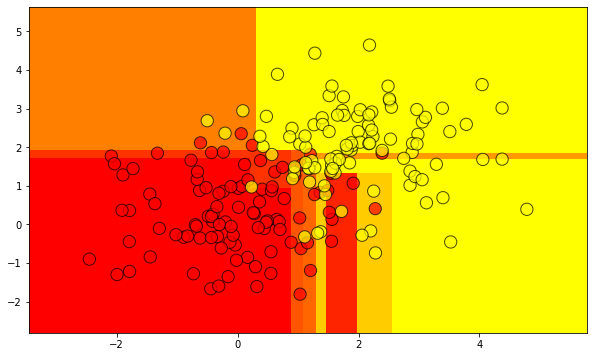

In [17]:
figure(figsize=(10.0, 6.0))
plot_model(data_x, data_y, DecisionTreeClassifier(min_samples_leaf=5), proba=True)